# **ML TEAM PROJECT SEMESTER 6**

## **Predicting Mode Switching Behavior in Transportation**

### **Introduction**
In the context of urban mobility, predicting changes in transportation mode preferences is crucial for optimizing commuting efficiency and sustainability. Our project analyzes travel duration, mode, time, purpose, and age to forecast individuals' likelihood of switching transportation modes. By identifying key influencing factors, this analysis aims to support informed decisions in transportation planning and urban mobility management. This report outlines our methodology, from data collection and exploratory analysis to the application of predictive modeling techniques and the interpretation of findings.


### **Objective**
 We aim to analyze various transportation metrics such as duration, mode, time, purpose, and age to determine whether an individual is likely to change their mode of transportation. This analysis will help in understanding the factors influencing transportation choices and in predicting potential shifts in transportation preferences.

### **Data Overview**
Our dataset comprises 250 responses with 12 attributes, including both categorical and numerical variables. The attributes are:
1. Timestamp
2. What is your age group?
3. Which of the following best describes your primary use case for transportation?
4. Which mode of transportation do you prefer?
5. Email Address
6. How frequently do you travel ?
7. How much do you spend on transportation on monthly basis(in Rs.) ?
8. Which mode of transportation you prefer the most?
9. On average, how long is your commute time (one way)?
10. On average, how many kilometers do you travel on a regular basis?
11. How likely are you to consider switching from public vehicle usage to private transportation in the future? (1 to 5)
12. What are the main reasons for choosing private vehicles? (Select all that apply)


###**Work Division**


*   **Ruchit Dhanuka (2241150)** - Form Creation, EDA through Excel, Data Visualization, KNN, Random Forest Classifier, Support Vector Machine

*   **Sakshee Priya (2241154)** - EDA through Python, Models Selection, Decision Tree, Naive Bayes, Interpretation, Editing




# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score

# **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file=pd.read_csv('/content/drive/MyDrive/Transport.csv')
file.head()

,Timestamp,What is your age group?,Which of the following best describes your primary use case for transportation?,Which mode of transportation do you prefer?,Email Address,How frequently do you travel ?,How much do you spend on transportation on monthly basis(in Rs.) ?,Which mode of transportation you prefer the most?,"On average, how long is your commute time (one way)?","On average, how long is your commute time (one way)?2",How likely are you to consider switching from public vehicle usage to private transportation in the future? (1 to 5),What are the main reasons for choosing private vehicles? (Select all that apply)
0,13-05-2024 22:46,18-25,Commuting to work or school,Public Transportation,saksheepriya2004@gmail.com,Less than once a week,400,Metro/Subway,30-45 minutes,1 km - 5 km,4.0,"Cost-effectiveness, Avoiding traffic congestion"
1,13-05-2024 22:55,18-25,Commuting to work or school,Private Transportation,arjun.nadukandiyil@bca.christuniversity.in,2-3 times per week,1000,Car,15-30 minutes,1 km - 5 km,NaN,"Environmental concernsConvenience (e.g., flexi..."
2,13-05-2024 22:57,18-25,Commuting to work or school,Public Transportation,lena.geo@bca.christuniversity.in,Multiple times daily,500,Bus,45-60 minutes,6 km - 15 km,NaN,"Cost-effectiveness, Convenience (e.g., accessi..."
3,13-05-2024 22:58,18-25,"Social outings (e.g., meeting friends, going t...",Private Transportation,manas.khanna@bca.christuniversity.in,2-3 times per week,300,Car,30-45 minutes,less than 1 km,1.0,"Convenience (e.g., flexibility, privacy), Time..."
4,13-05-2024 22:58,18-25,Commuting to work or school,Private Transportation,smriti.sinha@bca.christuniversity.in,Once daily,6000,Car,45-60 minutes,6 km - 15 km,3.0,"Convenience (e.g., flexibility, privacy), Comf..."


 ## **Modifying the Column Headings for easier Access**

In [ ]:
new_columns={"What is your age group?":"Age_Group",
             "Which of the following best describes your primary use case for transportation?":"P_Use",
             "Which mode of transportation do you prefer?":"Type",
             "How frequently do you travel ?":"Frequency",
             "How much do you spend on transportation on monthly basis(in Rs.) ?":"Expense",
             "Which mode of transportation you prefer the most?":"Mode",
             "On average, how long is your commute time (one way)?":"c_Time",
             "On average, how long is your commute time (one way)?2":"Distance",
             "How likely are you to consider switching from public vehicle usage to private transportation in the future? (1 to 5)":"switch_p",
             "What are the main reasons for choosing private vehicles? (Select all that apply)":"Reasons"}

In [ ]:
file=file.rename(columns=new_columns)

#**Dataset Description**

**Age_Group** : Age of the traveller

**P_Use** : Primary use of transportation by the traveller

**Type** : By which type of transportation the traveller prefer to travel (public/private/both)

**Frequency** : How many times the traveller travels in a week

**Expense** : Amount spent on travelling per month

**Mode** : Which mode of transportation do they prefer

**c_Time** : Time spent during travelling

**Distance** : How much distance do the ttraveller travels

**switch_p** : How likely the traveller wants to change their type of transportation (public to private) out of 5

**Reasons** : Why the traveller prefer the particular type of transportation chosen by them

***New Column***-

**Switch** : Likely to change mode from private to public and vice-versa
              (0 = not likely to change, 1= likely to change)

In [ ]:
file.head()

,Timestamp,Age_Group,P_Use,Type,Email Address,Frequency,Expense,Mode,c_Time,Distance,switch_p,Reasons
0,13-05-2024 22:46,18-25,Commuting to work or school,Public Transportation,saksheepriya2004@gmail.com,Less than once a week,400,Metro/Subway,30-45 minutes,1 km - 5 km,4.0,"Cost-effectiveness, Avoiding traffic congestion"
1,13-05-2024 22:55,18-25,Commuting to work or school,Private Transportation,arjun.nadukandiyil@bca.christuniversity.in,2-3 times per week,1000,Car,15-30 minutes,1 km - 5 km,NaN,"Environmental concernsConvenience (e.g., flexi..."
2,13-05-2024 22:57,18-25,Commuting to work or school,Public Transportation,lena.geo@bca.christuniversity.in,Multiple times daily,500,Bus,45-60 minutes,6 km - 15 km,NaN,"Cost-effectiveness, Convenience (e.g., accessi..."
3,13-05-2024 22:58,18-25,"Social outings (e.g., meeting friends, going t...",Private Transportation,manas.khanna@bca.christuniversity.in,2-3 times per week,300,Car,30-45 minutes,less than 1 km,1.0,"Convenience (e.g., flexibility, privacy), Time..."
4,13-05-2024 22:58,18-25,Commuting to work or school,Private Transportation,smriti.sinha@bca.christuniversity.in,Once daily,6000,Car,45-60 minutes,6 km - 15 km,3.0,"Convenience (e.g., flexibility, privacy), Comf..."


# **EDA(Exploratory Data Analysis)**

### **Dropping unwanted Columns**

In [ ]:
file=file.drop(columns=["Timestamp","Email Address"])

In [ ]:
file.head()

,Age_Group,P_Use,Type,Frequency,Expense,Mode,c_Time,Distance,switch_p,Reasons
0,18-25,Commuting to work or school,Public Transportation,Less than once a week,400,Metro/Subway,30-45 minutes,1 km - 5 km,4.0,"Cost-effectiveness, Avoiding traffic congestion"
1,18-25,Commuting to work or school,Private Transportation,2-3 times per week,1000,Car,15-30 minutes,1 km - 5 km,NaN,"Environmental concernsConvenience (e.g., flexi..."
2,18-25,Commuting to work or school,Public Transportation,Multiple times daily,500,Bus,45-60 minutes,6 km - 15 km,NaN,"Cost-effectiveness, Convenience (e.g., accessi..."
3,18-25,"Social outings (e.g., meeting friends, going t...",Private Transportation,2-3 times per week,300,Car,30-45 minutes,less than 1 km,1.0,"Convenience (e.g., flexibility, privacy), Time..."
4,18-25,Commuting to work or school,Private Transportation,Once daily,6000,Car,45-60 minutes,6 km - 15 km,3.0,"Convenience (e.g., flexibility, privacy), Comf..."


###**Taking care of missing values**

In [ ]:
file.isna().sum()

Age_Group     0
P_Use         0
Type          0
Frequency     0
Expense       1
Mode          0
c_Time        0
Distance      0
switch_p     66
Reasons       0
dtype: int64

**Observation**: The columns Expense and switch_p have missing values.

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_Group  250 non-null    object 
 1   P_Use      250 non-null    object 
 2   Type       250 non-null    object 
 3   Frequency  250 non-null    object 
 4   Expense    249 non-null    object 
 5   Mode       250 non-null    object 
 6   c_Time     250 non-null    object 
 7   Distance   250 non-null    object 
 8   switch_p   184 non-null    float64
 9   Reasons    250 non-null    object 
dtypes: float64(1), object(9)
memory usage: 19.7+ KB


In [ ]:
file["switch_p"] = file["switch_p"].apply(lambda x: np.random.randint(1, 6) if pd.isnull(x) else x)

###**All Missing values of switch_p is filled with random values between 1-5.**

In [ ]:
file.isna().sum()

Age_Group    0
P_Use        0
Type         0
Frequency    0
Expense      1
Mode         0
c_Time       0
Distance     0
switch_p     0
Reasons      0
dtype: int64

In [ ]:
file=file.fillna(method="ffill")

**Missing values in expense is filled using forward fill method.**

In [ ]:
file["Switch"]=file["switch_p"].apply(lambda x: 1 if x>3 else 0)
file=file.drop(columns=["switch_p"])

**A new Column Switch is added to understand whether a travel would change from Public to Private Tansportation or vice-versa.**

###**Modiying the data in Expense Column to make it numeric**

Now there are values like 1000-2000 , Rs.800,₹800.00. There are various prefixes and suffixes which are non-numeric

In [ ]:
file.iloc[15:30,:]

,Age_Group,P_Use,Type,Frequency,Expense,Mode,c_Time,Distance,Reasons,Switch
15,18-25,Commuting to work or school,Public Transportation,Multiple times daily,1000,Metro/Subway,Less than 15 minutes,1 km - 5 km,"Cost-effectiveness, Environmental concerns, Co...",0
16,18-25,"Social outings (e.g., meeting friends, going t...",Private Transportation,Multiple times daily,1000,Bicycle,More than 60 minutes,6 km - 15 km,"Cost-effectiveness, Environmental concerns, Co...",0
17,18-25,Commuting to work or school,Private Transportation,Once a week,2000,Car,30-45 minutes,6 km - 15 km,"Convenience (e.g., flexibility, privacy), Comf...",0
18,18-25,Commuting to work or school,Public Transportation,Multiple times daily,500,Bus,Less than 15 minutes,1 km - 5 km,Cost-effectiveness,1
19,26-35,Commuting to work or school,Private Transportation,Once daily,1000-1200,Motorcycle/Scooter,30-45 minutes,more than 15 km,"Cost-effectiveness, Environmental concerns, Co...",0
20,18-25,Commuting to work or school,Private Transportation,Multiple times daily,2100,Motorcycle/Scooter,More than 60 minutes,more than 15 km,"Convenience (e.g., flexibility, privacy)",0
21,18-25,Commuting to work or school,Public Transportation,Multiple times daily,5000-6000,Metro/Subway,45-60 minutes,more than 15 km,Cost-effectivenessTime-saving,0
22,18-25,"Social outings (e.g., meeting friends, going t...",Public Transportation,Once a week,200,Bus,Less than 15 minutes,6 km - 15 km,Cost-effectiveness,1
23,18-25,"Running errands (e.g., grocery shopping, appoi...",Private Transportation,2-3 times per week,1000,Motorcycle/Scooter,15-30 minutes,1 km - 5 km,"Cost-effectiveness, Environmental concerns, Co...",0
24,36-45,"Running errands (e.g., grocery shopping, appoi...",Private Transportation,Once daily,100,Car,15-30 minutes,more than 15 km,"Convenience (e.g., flexibility, privacy), Time...",1


###**To clean data like 1000-2000 to 1000, to make the column numeric**

In [ ]:
file['Expense'] = file['Expense'].apply(lambda x: x.split('-')[0] if '-' in x else x)

In [ ]:
file.iloc[15:30,:]

,Age_Group,P_Use,Type,Frequency,Expense,Mode,c_Time,Distance,Reasons,Switch
15,18-25,Commuting to work or school,Public Transportation,Multiple times daily,1000,Metro/Subway,Less than 15 minutes,1 km - 5 km,"Cost-effectiveness, Environmental concerns, Co...",0
16,18-25,"Social outings (e.g., meeting friends, going t...",Private Transportation,Multiple times daily,1000,Bicycle,More than 60 minutes,6 km - 15 km,"Cost-effectiveness, Environmental concerns, Co...",0
17,18-25,Commuting to work or school,Private Transportation,Once a week,2000,Car,30-45 minutes,6 km - 15 km,"Convenience (e.g., flexibility, privacy), Comf...",0
18,18-25,Commuting to work or school,Public Transportation,Multiple times daily,500,Bus,Less than 15 minutes,1 km - 5 km,Cost-effectiveness,1
19,26-35,Commuting to work or school,Private Transportation,Once daily,1000,Motorcycle/Scooter,30-45 minutes,more than 15 km,"Cost-effectiveness, Environmental concerns, Co...",0
20,18-25,Commuting to work or school,Private Transportation,Multiple times daily,2100,Motorcycle/Scooter,More than 60 minutes,more than 15 km,"Convenience (e.g., flexibility, privacy)",0
21,18-25,Commuting to work or school,Public Transportation,Multiple times daily,5000,Metro/Subway,45-60 minutes,more than 15 km,Cost-effectivenessTime-saving,0
22,18-25,"Social outings (e.g., meeting friends, going t...",Public Transportation,Once a week,200,Bus,Less than 15 minutes,6 km - 15 km,Cost-effectiveness,1
23,18-25,"Running errands (e.g., grocery shopping, appoi...",Private Transportation,2-3 times per week,1000,Motorcycle/Scooter,15-30 minutes,1 km - 5 km,"Cost-effectiveness, Environmental concerns, Co...",0
24,36-45,"Running errands (e.g., grocery shopping, appoi...",Private Transportation,Once daily,100,Car,15-30 minutes,more than 15 km,"Convenience (e.g., flexibility, privacy), Time...",1


###**To remove all prefixes, suffixes, or non-numeric characters**

In [ ]:
file['Expense'] = file['Expense'].apply(lambda x: re.sub(r'[^0-9.]', '', re.sub(r'Rs\.', '', x)))

###**Converting the cleaned column to integer datatype**

In [ ]:
file["Expense"]=(file["Expense"].astype(float)).astype(int)

In [ ]:
file.iloc[15:30,:]

,Age_Group,P_Use,Type,Frequency,Expense,Mode,c_Time,Distance,Reasons,Switch
15,18-25,Commuting to work or school,Public Transportation,Multiple times daily,1000,Metro/Subway,Less than 15 minutes,1 km - 5 km,"Cost-effectiveness, Environmental concerns, Co...",0
16,18-25,"Social outings (e.g., meeting friends, going t...",Private Transportation,Multiple times daily,1000,Bicycle,More than 60 minutes,6 km - 15 km,"Cost-effectiveness, Environmental concerns, Co...",0
17,18-25,Commuting to work or school,Private Transportation,Once a week,2000,Car,30-45 minutes,6 km - 15 km,"Convenience (e.g., flexibility, privacy), Comf...",0
18,18-25,Commuting to work or school,Public Transportation,Multiple times daily,500,Bus,Less than 15 minutes,1 km - 5 km,Cost-effectiveness,1
19,26-35,Commuting to work or school,Private Transportation,Once daily,1000,Motorcycle/Scooter,30-45 minutes,more than 15 km,"Cost-effectiveness, Environmental concerns, Co...",0
20,18-25,Commuting to work or school,Private Transportation,Multiple times daily,2100,Motorcycle/Scooter,More than 60 minutes,more than 15 km,"Convenience (e.g., flexibility, privacy)",0
21,18-25,Commuting to work or school,Public Transportation,Multiple times daily,5000,Metro/Subway,45-60 minutes,more than 15 km,Cost-effectivenessTime-saving,0
22,18-25,"Social outings (e.g., meeting friends, going t...",Public Transportation,Once a week,200,Bus,Less than 15 minutes,6 km - 15 km,Cost-effectiveness,1
23,18-25,"Running errands (e.g., grocery shopping, appoi...",Private Transportation,2-3 times per week,1000,Motorcycle/Scooter,15-30 minutes,1 km - 5 km,"Cost-effectiveness, Environmental concerns, Co...",0
24,36-45,"Running errands (e.g., grocery shopping, appoi...",Private Transportation,Once daily,100,Car,15-30 minutes,more than 15 km,"Convenience (e.g., flexibility, privacy), Time...",1


In [ ]:
file.shape

(250, 10)

###**Boxplot to remove any outliers**

Expense       Axes(0.125,0.11;0.0545775x0.77)
Switch     Axes(0.190493,0.11;0.0545775x0.77)
dtype: object

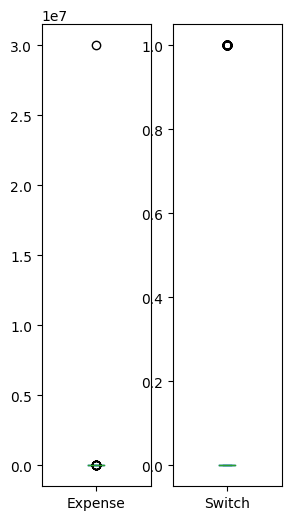

In [ ]:
file.plot(kind ='box', subplots= True , figsize =(20,6),layout=(1,12))

In [ ]:
q1=file["Expense"].quantile(0.25)
q3=file["Expense"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
file=file[(file["Expense"]>lb) & (file["Expense"]<ub)]

<Axes: ylabel='Expense'>

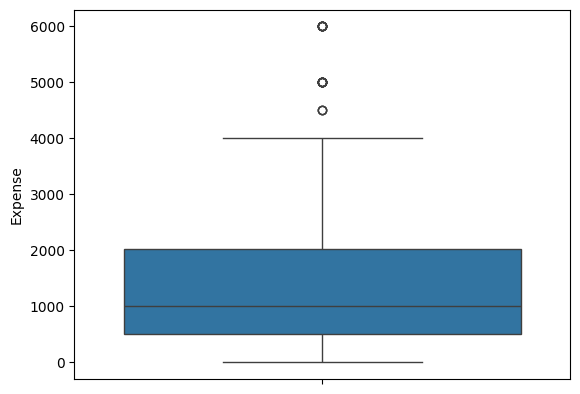

In [ ]:
sns.boxplot(file["Expense"])

**All outliers are removed, the original shape was (250,10), now the modified shape is (236,10) , which means around 15 data were outliers**

###**Dataset Information**

In [ ]:
#To see shape of the dataset
file.shape

(236, 10)

In [ ]:
#To see information about the dataset
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 249
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age_Group  236 non-null    object
 1   P_Use      236 non-null    object
 2   Type       236 non-null    object
 3   Frequency  236 non-null    object
 4   Expense    236 non-null    int64 
 5   Mode       236 non-null    object
 6   c_Time     236 non-null    object
 7   Distance   236 non-null    object
 8   Reasons    236 non-null    object
 9   Switch     236 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 20.3+ KB


In [ ]:
#To see all datatypes
file.dtypes

Age_Group    object
P_Use        object
Type         object
Frequency    object
Expense       int64
Mode         object
c_Time       object
Distance     object
Reasons      object
Switch        int64
dtype: object

###**Some Visualizations**

([<matplotlib.patches.Wedge at 0x7d43a2860a60>,
 [Text(0.49416369643413605, 0.9827523803718571, '18-25'),
  Text(-1.0347702832712498, 0.3731627806450395, '26-35'),
  Text(-0.8652067324027531, -0.6792770496674763, '46-55'),
  Text(-0.1023528871895815, -1.0952277783566107, 'Under 18'),
  Text(0.656004054107843, -0.8829828316530703, '36-45'),
  Text(1.053164228087999, -0.3175611888688692, '56 and above')],
 [Text(0.2695438344186196, 0.5360467529301038, '35.2%'),
  Text(-0.5644201545115907, 0.20354333489729423, '18.6%'),
  Text(-0.4719309449469562, -0.37051475436407794, '13.6%'),
  Text(-0.055828847557953545, -0.5973969700126966, '12.3%'),
  Text(0.3578203931497325, -0.4816269990834929, '11.0%'),
  Text(0.5744532153207266, -0.1732151939284741, '9.3%')])

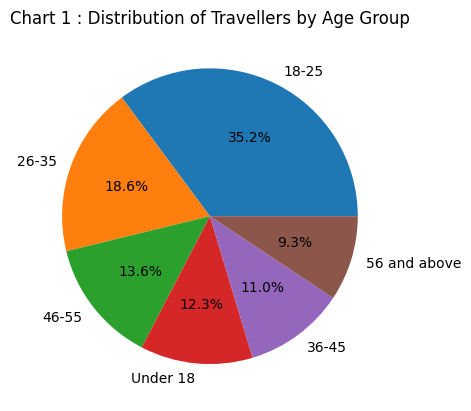

In [ ]:
#Chart 1
plt.title('Chart 1 : Distribution of Travellers by Age Group')
plt.pie(file["Age_Group"].value_counts(),labels=file["Age_Group"].value_counts().index,autopct='%1.1f%%')

 **Observation** :

Interpretation of the Pie Chart Segments:

**18-25**: This age group is the largest segment of the pie chart, accounting for 35.2% of the total. It indicates that a significant portion of the population falls within the 18-25 age range.

**26-35**: The next largest segment is the 26-35 age group, representing 18.6% of the pie chart. This suggests that a substantial number of individuals are in the prime working and family-building years.

**46-55**: This age group accounts for 13.6% of the pie chart, indicating a moderate proportion of the population falls within the middle-aged range.

**Under 1**8: The segment representing individuals under the age of 18 comprises 12.3% of the pie chart, highlighting a notable portion of younger individuals.

**36-45**: This age group represents 11.0% of the pie chart, indicating a moderate proportion of individuals in their late thirties to mid-forties.

**56 and above**: The segment for individuals aged 56 and above accounts for 9.3% of the pie chart, indicating a smaller but significant portion of the population in older age brackets.

**The chart provides a visual breakdown of the population distribution across different age groups.It illustrates that the largest age group is 18-25, followed by 26-35 and then 46-55.**


([<matplotlib.patches.Wedge at 0x7d43a2c6d090>,
 [Text(-0.13147208836038615, 1.092114961889159, 'Private Transportation'),
  Text(0.1314720883603863, -1.0921149618891588, 'Public Transportation')],
 [Text(-0.07171204819657426, 0.5956990701213594, '53.8%'),
  Text(0.07171204819657433, -0.5956990701213593, '46.2%')])

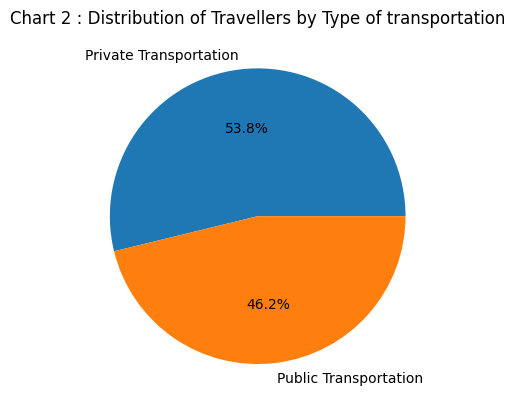

In [ ]:
#Chart 2
plt.title('Chart 2 : Distribution of Travellers by Type of transportation')
plt.pie(file["Type"].value_counts(),labels=file["Type"].value_counts().index,autopct='%1.1f%%')

**Observation** : In this pie chart:

The Public Transportation segment is larger, indicating that a majority (53.8%) of travelers prefer or use public transport.

The Private Transport segment is smaller, representing the remaining 46.2% who opt for private transport.

([<matplotlib.patches.Wedge at 0x7d43a2cc9090>,
 [Text(0.35935541552629474, 1.039645942295705, 'Commuting to work or school'),
  Text(-1.0572981190645878, -0.3035138998834896, 'Social outings (e.g., meeting friends, going to events)'),
  Text(0.14599813451150762, -1.0902681068063762, 'Running errands (e.g., grocery shopping, appointments)'),
  Text(0.9166453281187837, -0.608080046077823, 'Recreational activities (e.g., going to the gym, visiting parks)'),
  Text(1.0921149626584905, -0.13147208196968718, 'Temple'),
  Text(1.0999025390408894, -0.014642561640815337, 'Temple ')],
 [Text(0.1960120448325244, 0.5670796048885662, '39.4%'),
  Text(-0.5767080649443205, -0.1655530363000852, '30.1%'),
  Text(0.07963534609718596, -0.5946916946216597, '15.3%'),
  Text(0.4999883607920638, -0.331680025133358, '11.9%'),
  Text(0.5956990705409948, -0.07171204471073846, '3.0%'),
  Text(0.5999468394768487, -0.007986851804081091, '0.4%')])

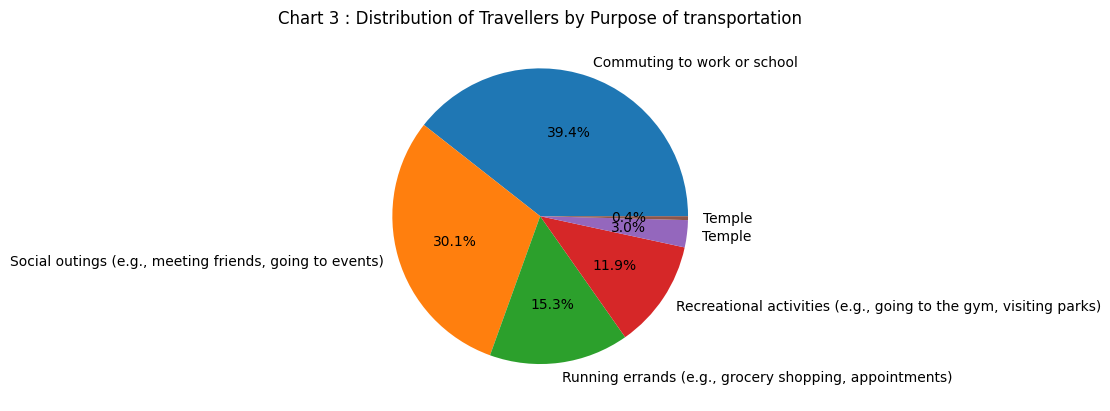

In [ ]:
#Chart 3
plt.title('Chart 3 : Distribution of Travellers by Purpose of transportation')
plt.pie(file["P_Use"].value_counts(),labels=file["P_Use"].value_counts().index,autopct='%1.1f%%')

**Observation** :

Interpretation of the Segments:

**Commuting to work or school**: This category represents the largest segment of the pie chart, accounting for 39.4%. It indicates that a significant portion of travel is attributed to commuting to work or school.

**Social outings (e.g., meeting friends, going to events)**: This category accounts for 30.1% of the pie chart. It suggests that a considerable number of trips are made for social purposes such as meeting friends or attending events.

**Running errands (e.g., grocery shopping, appointments)**: This category comprises 15.3% of the pie chart, indicating that a moderate proportion of travel is for running errands like grocery shopping or attending appointments.

**Recreational activities (e.g., going to the gym, visiting parks)**: This category represents 11.9% of the pie chart. It signifies that a smaller but notable amount of travel is for recreational activities such as going to the gym or visiting parks.

**Temple** : There are two entries for "Temple" with percentages of 3.0% and 0.4%. These segments represent travel specifically for religious purposes, accounting for a smaller portion of overall travel.

**The chart provides a breakdown of travel purposes or activities, emphasizing that commuting to work or school is the most common reason for travel, followed by social outings and running errands. It effectively visualizes how different categories contribute to overall travel behavior, highlighting the diversity of reasons people travel and use transportation.**

([<matplotlib.patches.Wedge at 0x7d43a2b37dc0>,
 [Text(0.7778174593052024, 0.7778174593052023, 'Motorcycle/Scooter'),
  Text(-0.7353179327238304, 0.8181121792362908, 'Car'),
  Text(-0.9955589950513902, -0.46782719819637036, 'Metro/Subway'),
  Text(-0.17496983958922185, -1.0859951911652843, 'Bus'),
  Text(0.48103805623307444, -0.9892433413753695, 'Bicycle'),
  Text(0.7982477180516592, -0.7568359007244034, 'Train'),
  Text(1.0016982497797564, -0.4545334051400106, 'Tram'),
  Text(1.0882280687138062, -0.1604981945799388, 'Auto'),
  Text(1.0999025385267878, -0.01464260025843086, 'Auto ')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.4010825087584529, 0.44624300685615853, '23.3%'),
  Text(-0.5430321791189401, -0.2551784717434747, '17.4%'),
  Text(-0.09543809432139373, -0.5923610133628823, '13.6%'),
  Text(0.26238439430894966, -0.5395872771138378, '5.9%'),
  Text(0.43540784620999584, -0.4128195822133109, '5.5%'),
  Text(0.5463808635162307, -0.24792731189455122, '5.1%')

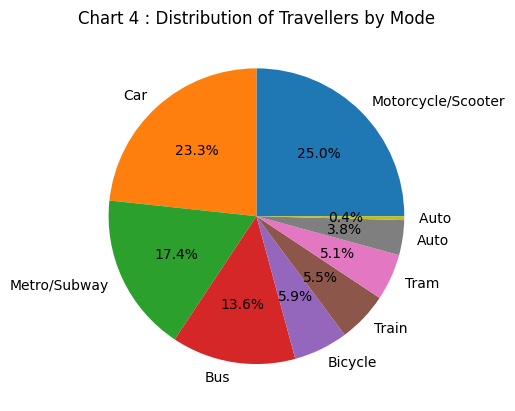

In [ ]:
#Chart 4
plt.title('Chart 4 : Distribution of Travellers by Mode')
plt.pie(file["Mode"].value_counts(),labels=file["Mode"].value_counts().index,autopct='%1.1f%%')

**Observation:**

Interpretation of the Segments:

**Motorcycle/Scooter**: Preferred by 25.0% of individuals. It indicates a significant preference for motorcycles or scooters among the surveyed population.

**Car**: Chosen by 23.3% of individuals. This segment highlights the popularity of cars as a mode of transportation.

**Metro/Subway**: Used by 17.4% of individuals. This suggests a notable reliance on metro or subway systems for commuting or traveling.

**Bus**: Utilized by 13.6% of individuals. This shows a substantial number of people opt for buses as their mode of transportation.

**Bicycle**: Selected by 5.9% of individuals. This indicates a modest but notable preference for bicycles among respondents.

**Train**: Preferred by 5.5% of individuals. This segment signifies the usage of trains for travel purposes.

**Tram**: Chosen by 5.1% of individuals. It reflects a smaller but notable preference for tram systems.

**Auto**: Represents 3.8% and 0.4% of individuals' choices. This segment indicates a preference for autos among a minority of respondents.

**The pie chart provides a clear breakdown of transportation mode preferences among surveyed individuals, highlighting motorcycles/scooters and cars as the most popular choices. Public transportation options like metro/subway, bus, bicycle, train, and tram also play significant roles, catering to various travel preferences among the population.**

Text(0.5, 1.0, 'Chart 5 : Type vs Expense')

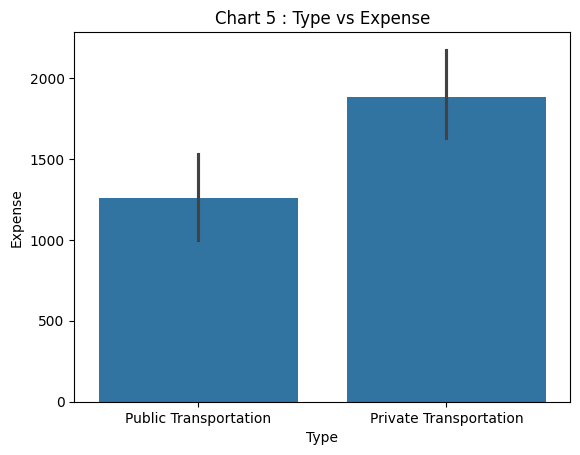

In [ ]:
#Chart 5
sns.barplot(x=file["Type"],y=file["Expense"],estimator=np.mean)
plt.title("Chart 5 : Type vs Expense")



**Observation**:

Interpretation of the Bar Plot:

**Private Transportation**: The bar representing private transportation is noticeably larger than that of public transportation. This indicates that, on average, individuals spending on private transportation modes tend to have higher expenses compared to those using public transportation.

**Public Transportation**: The bar representing public transportation is smaller than that of private transportation. This suggests that, on average, individuals spending on public transportation modes have lower expenses compared to those using private transportation.

**The plot visually contrasts the average expenses between private and public transportation modes. It effectively shows that private transportation users generally incur higher expenses compared to public transportation users, highlighting the financial differences in these travel choices.**

Text(0.5, 1.0, 'Chart 6 : Purpose vs Expense')

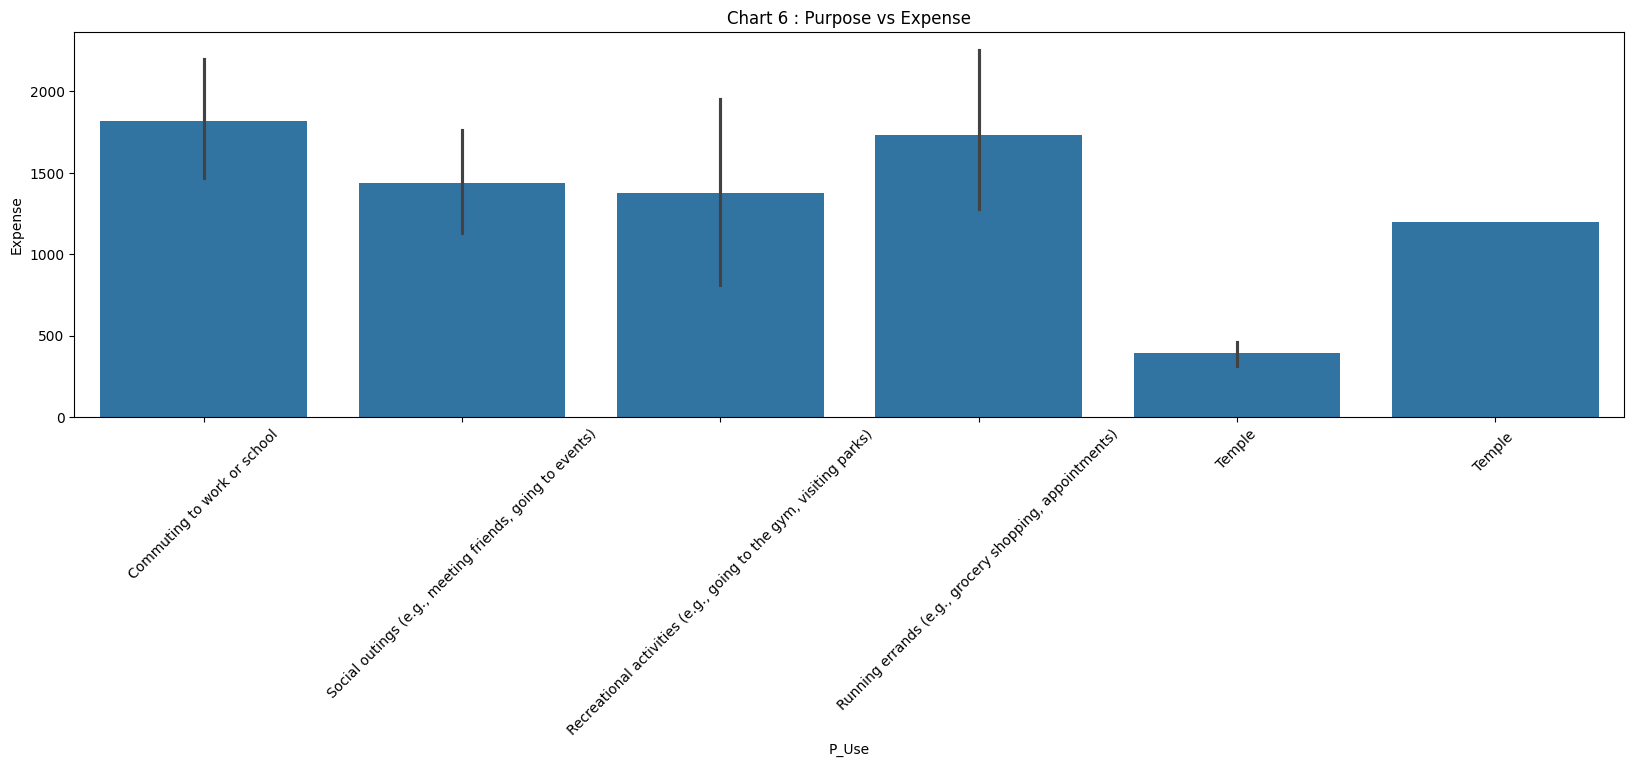

In [ ]:
#Chart 6
plt.figure(figsize=(20,5))
sns.barplot(x=file["P_Use"],y=file["Expense"],estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Chart 6 : Purpose vs Expense")

**Observation**:
The plot visually compares average expenses across different purposes.
Each bar represents the average expense associated with a specific purpose.
Here it shows that travelers "Commuting to work or school" and "Running errands (e.g., grocery shopping, appointments)" have expenses than the other purposes. Its the least for the people going to "Temple".

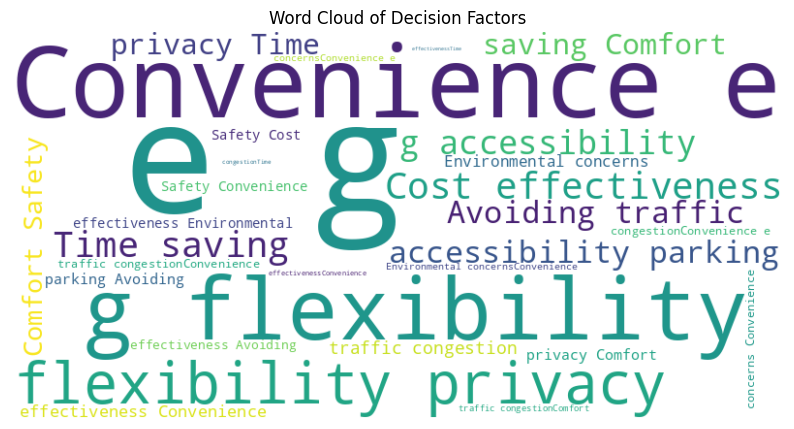

In [ ]:
#Chart 7
text = ' '.join(file['Reasons'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Decision Factors')
plt.axis('off')
plt.show()

**Observation**:

The word cloud visualizes the frequency and prominence of words extracted from the column 'Reasons' in the dataset, where each word's size indicates its relative frequency.

**Convenience, Flexibility, Time Saving, Cost Effectiveness**: These words appear prominently in the word cloud, indicated by their larger size. This suggests that these factors are frequently cited as significant considerations influencing transportation decisions.

**Privacy, Traffic, Environment Concerns**: These words are smaller in size compared to the prominent words. They represent other factors that also play a role in decision-making but are mentioned less frequently or are considered less impactful compared to the larger words.

**The word cloud effectively visualizes the most prevalent reasons influencing transportation choices based on the dataset.
It highlights that convenience, flexibility, time saving, and cost effectiveness are major drivers influencing decisions.**

###**Encoding Categorical data as Numerical Data**

In [ ]:
features=file.loc[:,["P_Use","Type","Frequency","Mode","c_Time","Distance"]]
label_encoder={}
for column in features.columns:
  label_encoder[column]=LabelEncoder()
  file[column]=label_encoder[column].fit_transform(file[column])

In [ ]:
file

,Age_Group,P_Use,Type,Frequency,Expense,Mode,c_Time,Distance,Reasons,Switch
0,18-25,0,1,1,400,5,1,0,"Cost-effectiveness, Avoiding traffic congestion",1
1,18-25,0,0,0,1000,4,0,0,"Environmental concernsConvenience (e.g., flexi...",0
2,18-25,0,1,2,500,3,2,1,"Cost-effectiveness, Convenience (e.g., accessi...",0
3,18-25,3,0,0,300,4,1,2,"Convenience (e.g., flexibility, privacy), Time...",0
4,18-25,0,0,4,6000,4,2,1,"Convenience (e.g., flexibility, privacy), Comf...",0
...,...,...,...,...,...,...,...,...,...,...
245,Under 18,1,0,0,600,6,0,0,"Convenience (e.g., flexibility, privacy)",0
246,Under 18,1,1,2,450,7,1,0,Cost-effectiveness,1
247,Under 18,4,0,3,400,4,0,1,Time-saving,0
248,Under 18,1,0,3,2500,4,4,3,Comfort,0


In [ ]:
features=file.loc[:,["Age_Group"]]
label_encoder={}
for column in features.columns:
  label_encoder[column]=LabelEncoder()
  file[column]=label_encoder[column].fit_transform(file[column])

In [ ]:
file.dtypes

Age_Group     int64
P_Use         int64
Type          int64
Frequency     int64
Expense       int64
Mode          int64
c_Time        int64
Distance      int64
Reasons      object
Switch        int64
dtype: object

#**Train and Test Split**

In [ ]:
X=file.drop(["Switch","Reasons"],axis=1)
y=file['Switch']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# **Applying Different Machine Learing Models**

# **1.Decision Tree**

## 1.1.Decision Tree Model Using Gini

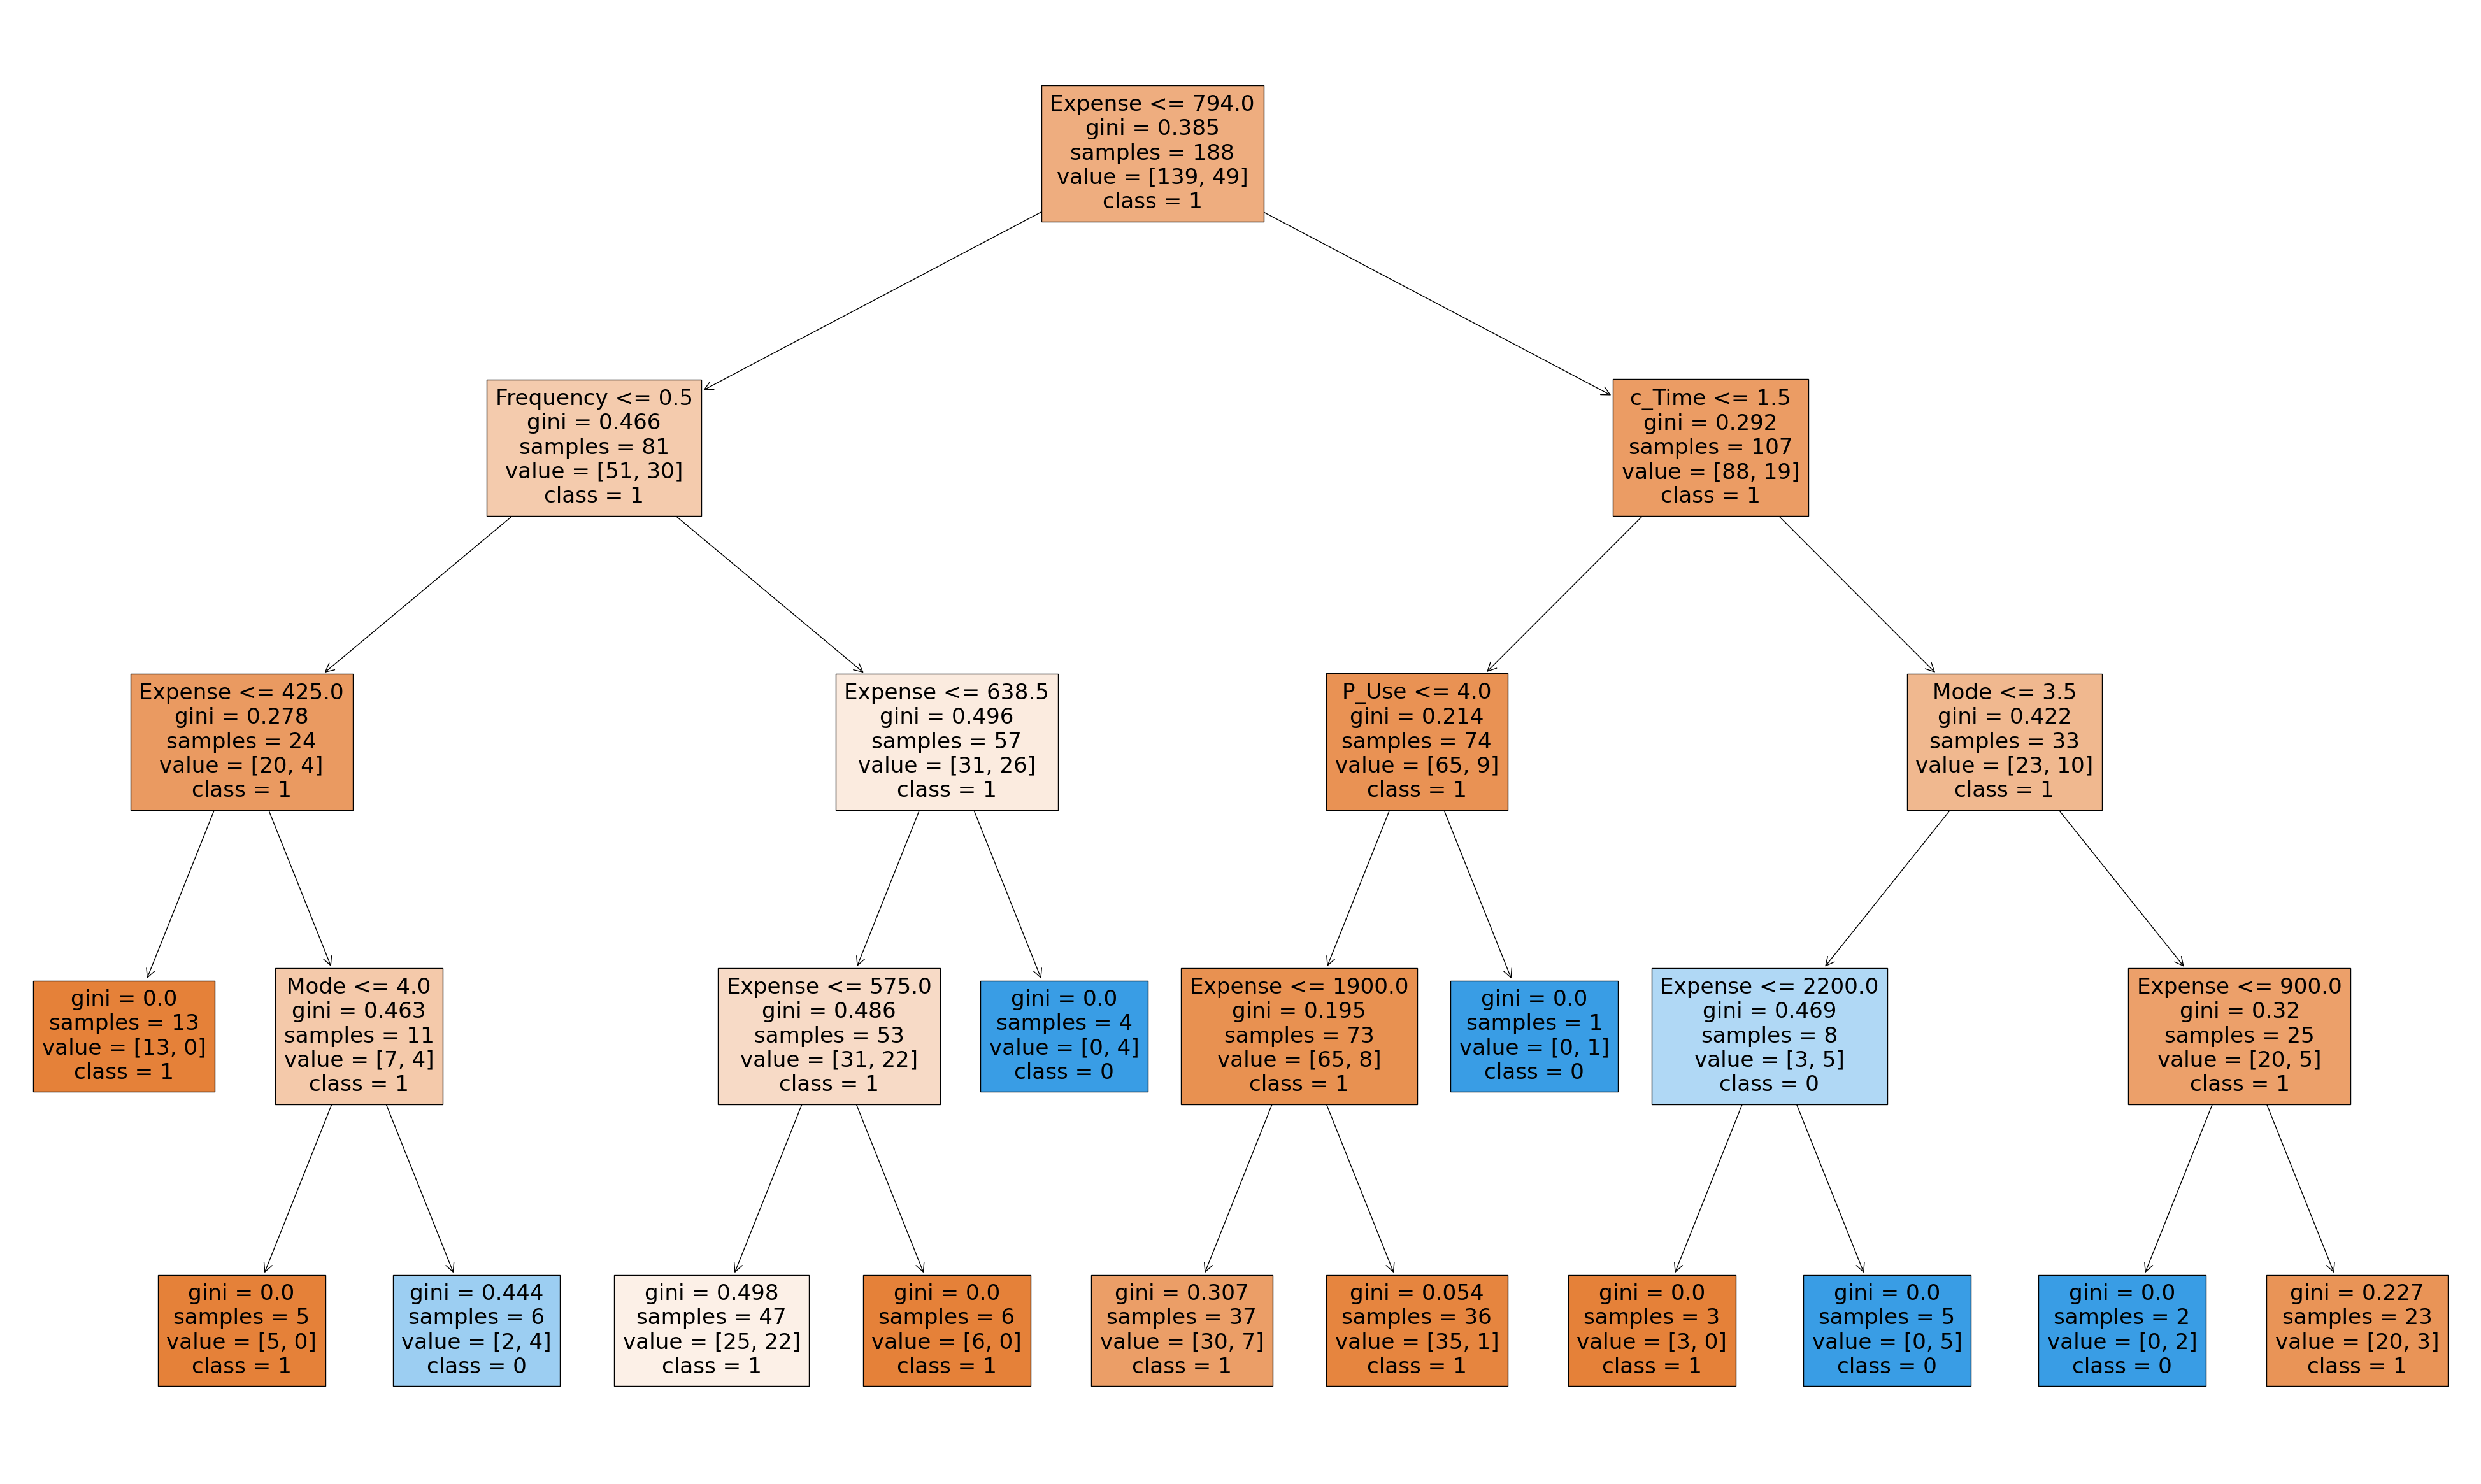

In [ ]:
classifier = DecisionTreeClassifier(criterion="gini",max_depth = 4, random_state=0)
classifier.fit(X_train, y_train)
class_names = [str(class_val) for class_val in y.unique()]

# Visualize the pruned decision tree
fig, ax = plt.subplots(figsize=(50, 30))
tree.plot_tree(classifier, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0]


[[36  5]
 [ 6  1]]


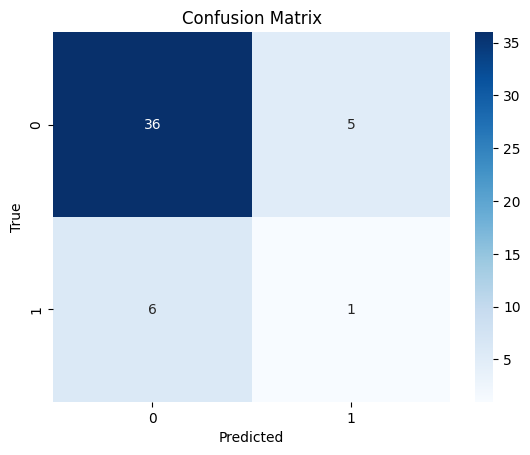


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.17      0.14      0.15         7

    accuracy                           0.77        48
   macro avg       0.51      0.51      0.51        48
weighted avg       0.76      0.77      0.76        48

Accuracy: 0.77


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

### **Interpretation**

1. **Accuracy**: 0.77

    The overall accuracy of the model is 77%, indicating that 77% of the predictions made by the model are correct.

2. **Confusion Matrix**:

    **True Negatives (TN)**: 36 - The number of instances correctly predicted as not likely to change (0).

    **False Positives (FP)**: 5 - The number of instances incorrectly predicted as likely to change (1) when they are not.

    **False Negatives (FN)**: 6 - The number of instances incorrectly predicted as not likely to change (0) when they are likely to change (1).

    **True Positives (TP)**: 1 - The number of instances correctly predicted as likely to change (1).

3. **Classification Report**:
    **Precision**: Precision for class 0 (not likely to change) is 0.86, meaning 86% of instances predicted as not likely to change were correct. Precision for class 1 (likely to change) is 0.17, indicating 17% of instances predicted as likely to change were correct.

    **Recall**: Recall for class 0 is 0.88, indicating 88% of actual instances of not likely to change were correctly predicted. Recall for class 1 is 0.14, meaning only 14% of actual instances of likely to change were correctly predicted.

    **F1-score**: The F1-score combines precision and recall into a single metric. F1-score for class 0 is 0.87, and for class 1 is 0.15.

    **Support**: The number of instances in each class (41 for class 0 and 7 for class 1).

**Overall Summary**: The model achieves a moderate accuracy of 77%, driven primarily by good performance in predicting class 0 (not likely to change). However, it struggles with class 1 (likely to change), showing significantly lower precision, recall, and F1-score, indicating challenges in correctly identifying instances where individuals are likely to switch transportation modes.

### **ROC Curve and AUC**

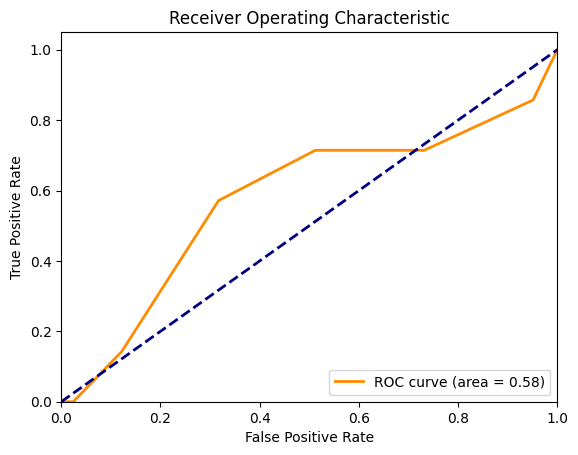

In [ ]:
y_test_binary = np.where(y_test == 1, 1, 0)
y_pred_binary = np.where(y_pred == 1, 1, 0)
fpr, tpr, thresholds = roc_curve(y_test_binary, classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test_binary, classifier.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Observation :**

**AUC of 0.58:**An AUC (Area Under the Curve) of 0.58 suggests that the model's ability to distinguish between the positive and negative classes is slightly better than random guessing. However, it indicates that the model's predictive power is relatively weak.
This score implies that there is room for improvement in the model to increase its discriminative ability and better predict the likelihood of switching transportation modes.


## 1.2.Decision Tree Model Using Entropy

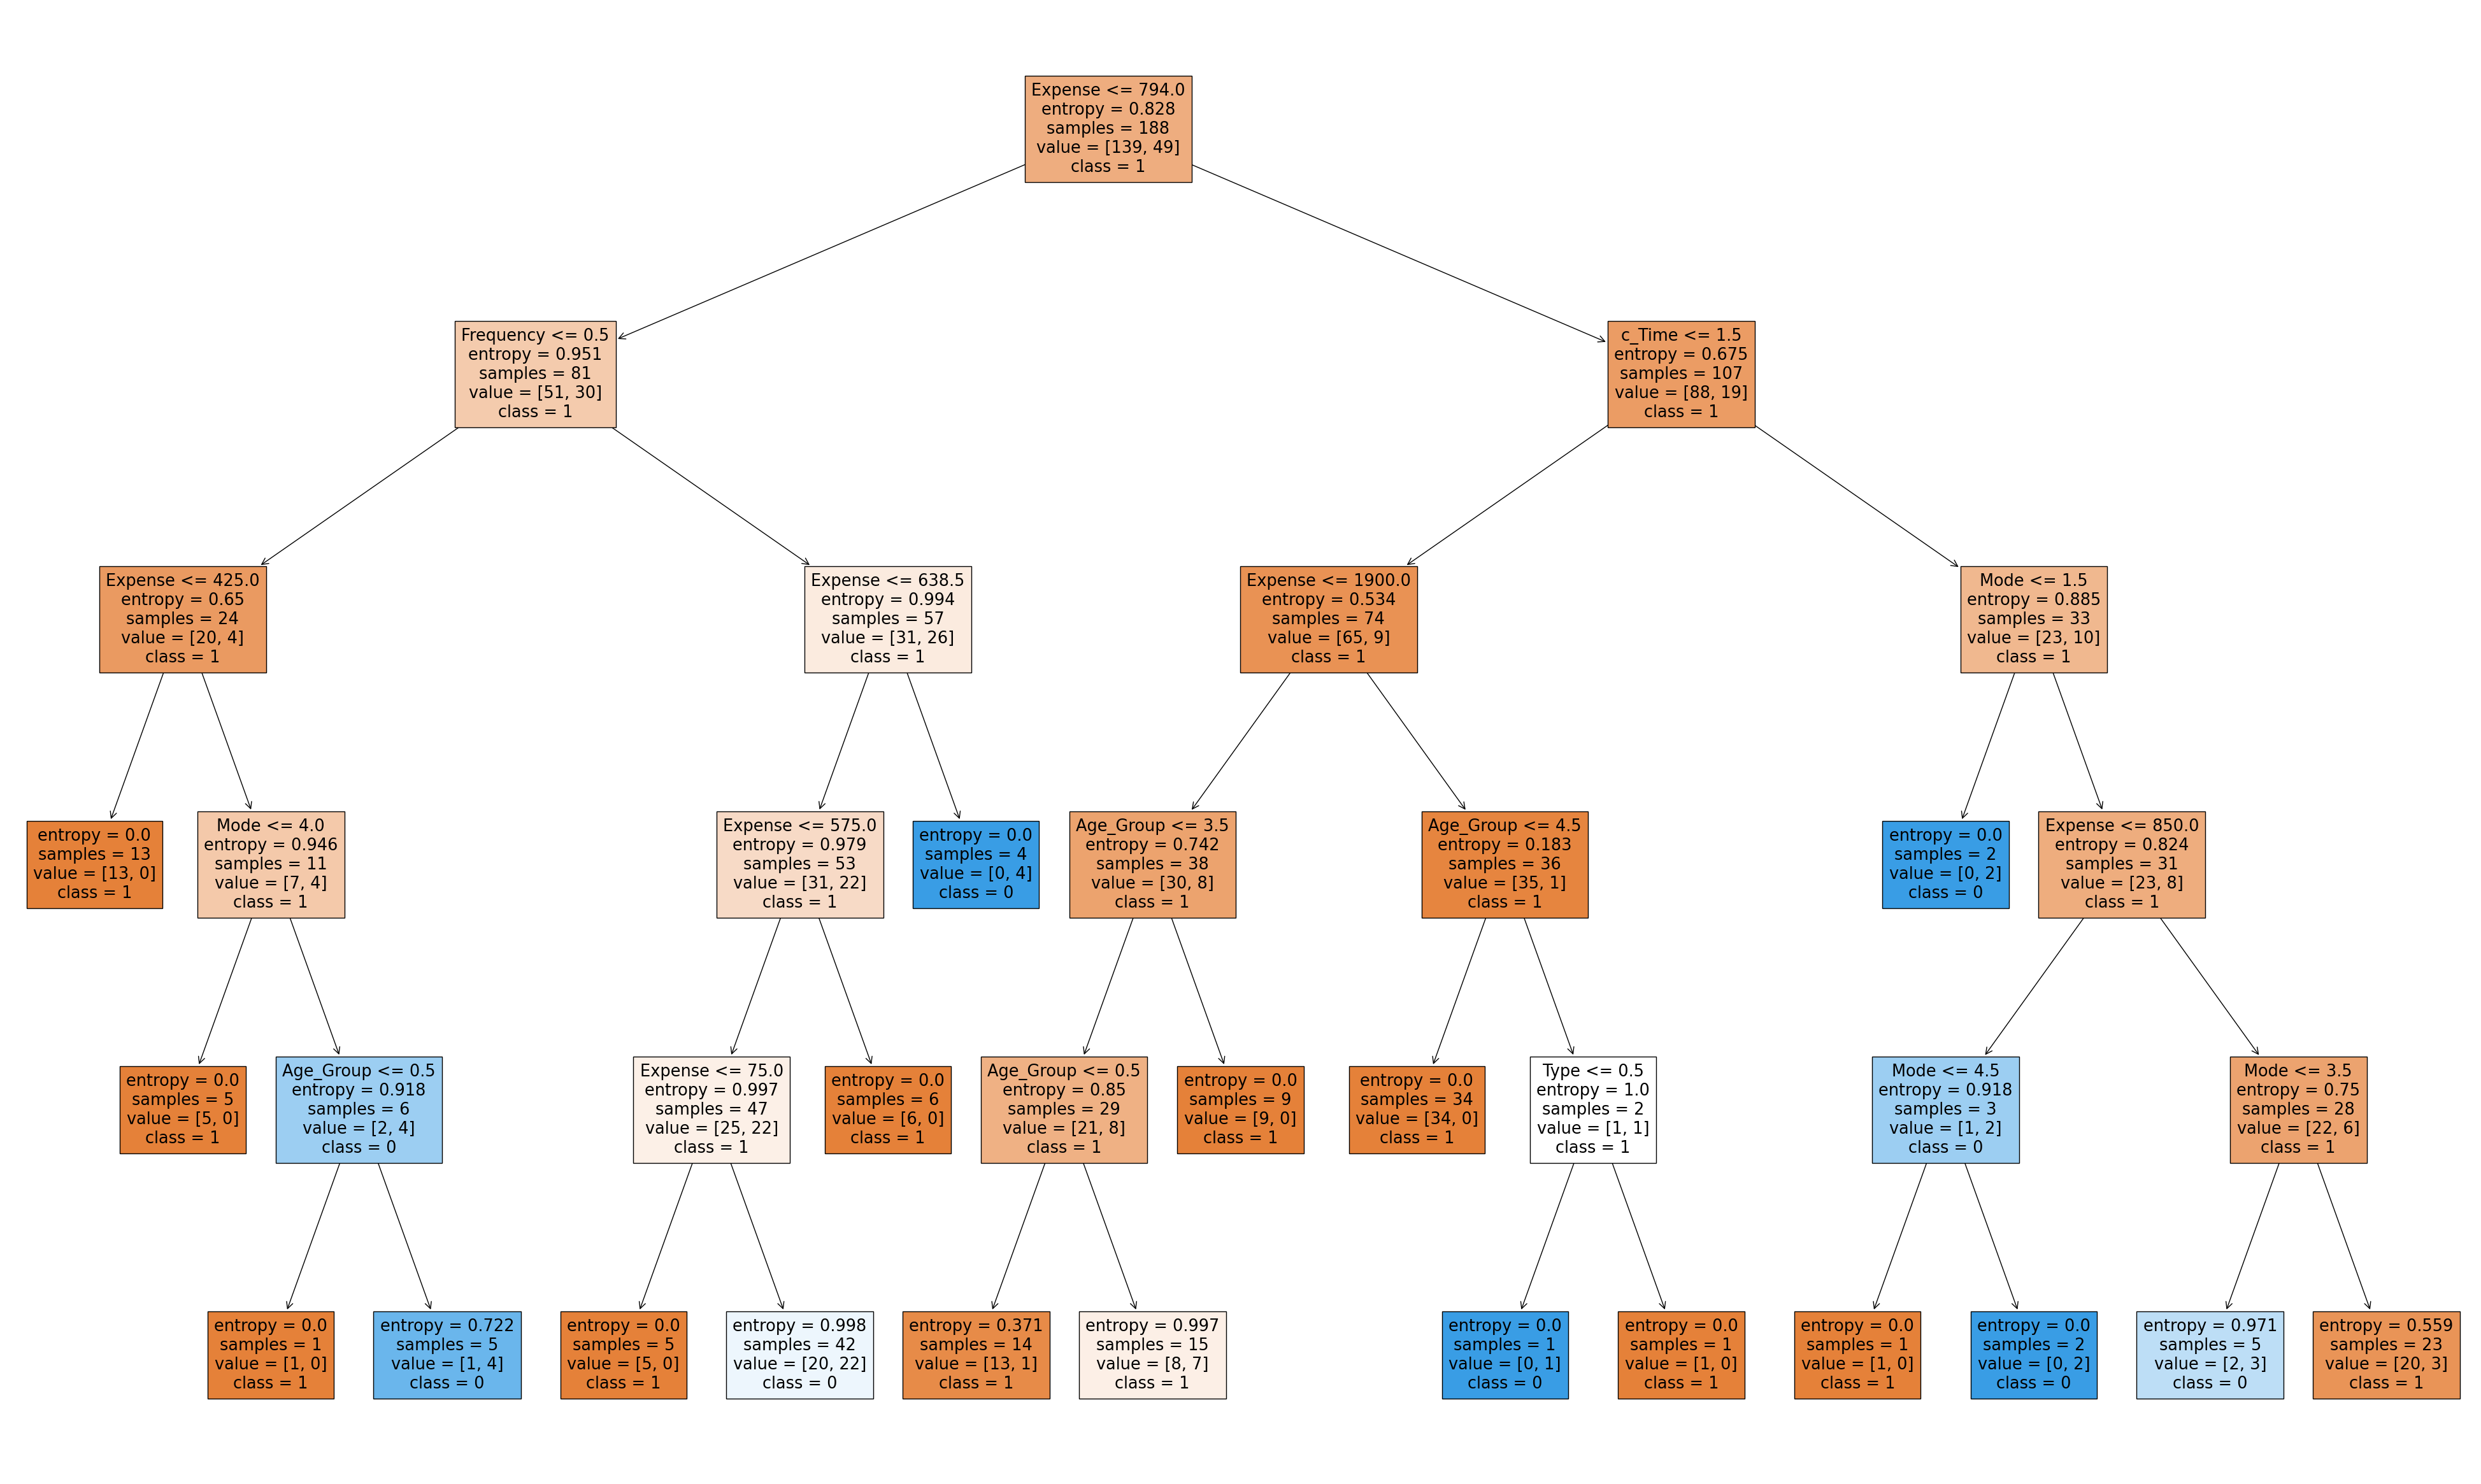

In [ ]:
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=5, random_state=0)
classifier.fit(X_train, y_train)
class_names = [str(class_val) for class_val in y.unique()]

# Visualize the pruned decision tree
fig, ax = plt.subplots(figsize=(50, 30))
tree.plot_tree(classifier, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0])

[[30 11]
 [ 4  3]]


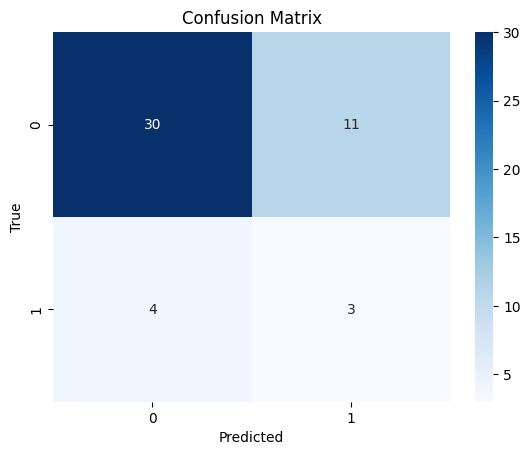


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        41
           1       0.21      0.43      0.29         7

    accuracy                           0.69        48
   macro avg       0.55      0.58      0.54        48
weighted avg       0.78      0.69      0.73        48

Accuracy: 0.69


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

### **Interpretation**

1. **Accuracy**: 0.69
    
    The overall accuracy of the decision tree model using entropy is 69%, indicating that 69% of the predictions made by the model are correct.

2. **Confusion Matrix**:

    - **True Negatives (TN)**: 30 - The number of instances correctly predicted as not likely to change (0).
    
    - **False Positives (FP)**: 11 - The number of instances incorrectly predicted as likely to change (1) when they are not.
    
    - **False Negatives (FN)**: 4 - The number of instances incorrectly predicted as not likely to change (0) when they are likely to change (1).
    
    - **True Positives (TP)**: 3 - The number of instances correctly predicted as likely to change (1).

3. **Classification Report**:
    
    - **Precision**: Precision for class 0 (not likely to change) is 0.88, meaning 88% of instances predicted as not likely to change were correct. Precision for class 1 (likely to change) is 0.21, indicating 21% of instances predicted as likely to change were correct.
    
    - **Recall**: Recall for class 0 is 0.73, indicating 73% of actual instances of not likely to change were correctly predicted. Recall for class 1 is 0.43, meaning 43% of actual instances of likely to change were correctly predicted.
    
    - **F1-score**: The F1-score combines precision and recall into a single metric. F1-score for class 0 is 0.80, and for class 1 is 0.29.
    
    - **Support**: The number of instances in each class (41 for class 0 and 7 for class 1).

**Overall Summary**:
The decision tree model using entropy achieves an accuracy of 69%, indicating moderate performance in predicting the likelihood of switching transportation modes (0 = not likely, 1 = likely). It shows higher precision and recall for class 0 (not likely to change), suggesting the model is better at predicting instances where individuals are not likely to switch modes. However, class 1 (likely to change) has lower precision and recall, indicating challenges in accurately predicting instances where individuals are likely to switch transportation modes.

### **ROC Curve and AUC**

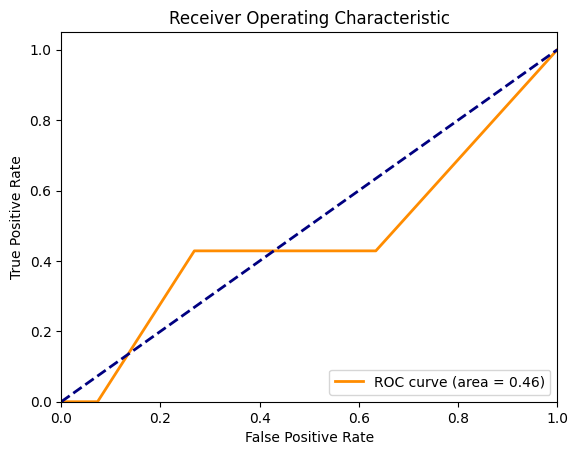

In [ ]:
y_test_binary = np.where(y_test == 1, 1, 0)
y_pred_binary = np.where(y_pred == 1, 1, 0)
fpr, tpr, thresholds = roc_curve(y_test_binary, classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test_binary, classifier.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Observation:**

**AUC of 0.46:**  An AUC of 0.46 indicates that the model's ability to distinguish between the positive and negative classes (likely to change and not likely to change transportation modes) is very poor. This score suggests that the model is performing worse than random guessing, highlighting substantial limitations in its predictive capability. The model's discriminative ability is extremely weak, and it is not reliable in differentiating individuals likely to switch transportation modes from those who are not. Significant improvements are necessary to enhance the model's performance and predictive accuracy in this context.

# **2.KNN**

## **Calculating the Accuracy Score for Different 'k' Values**

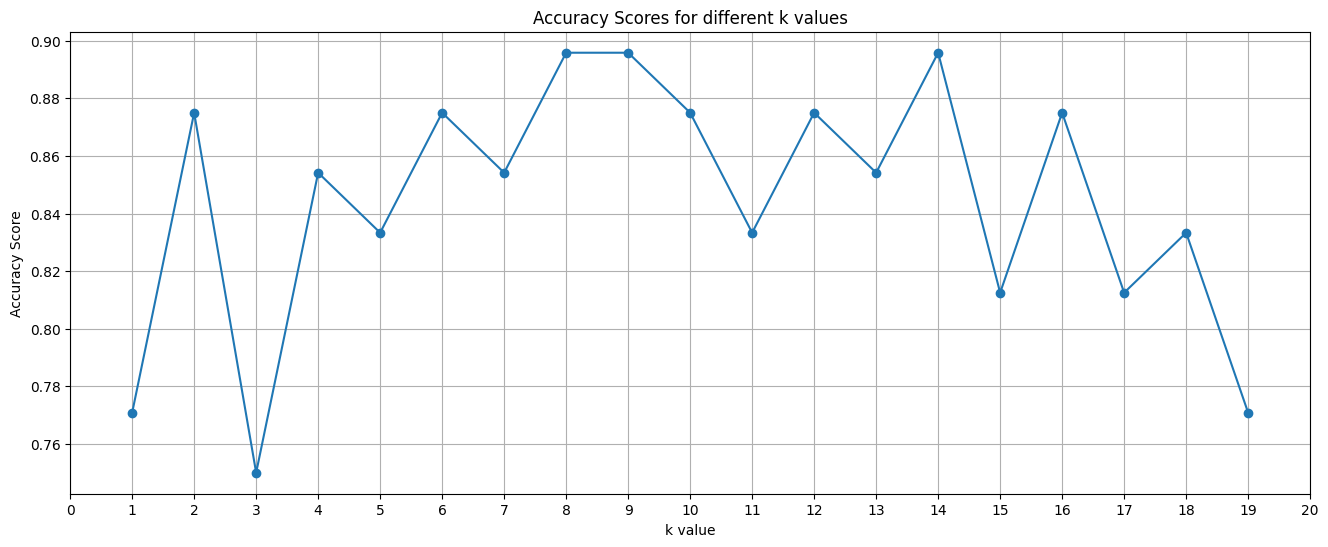

In [ ]:
accuracy_scores = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(16, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy Scores for different k values')
plt.xlabel('k value')
plt.ylabel('Accuracy Score')
plt.xticks(range(0, 21))
plt.grid()
plt.show()


## **Comparative Analysis of Obtained Accuracy with Various Distances and k Values Using a Suitable Plot**

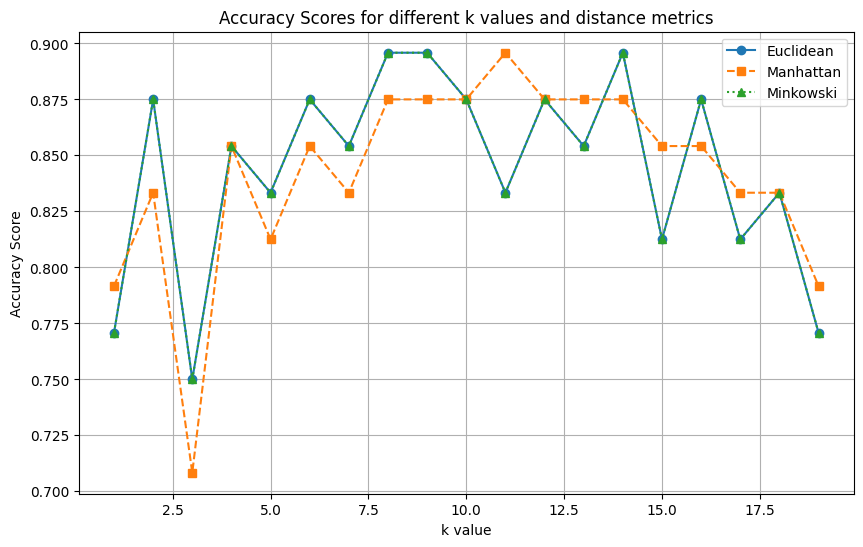

In [ ]:
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
accuracy_scores = {metric: [] for metric in distance_metrics}
k_values = range(1, 20)

for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy_scores[metric].append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))

plt.plot(k_values, accuracy_scores['euclidean'], marker='o', linestyle='-', label='Euclidean')

plt.plot(k_values, accuracy_scores['manhattan'], marker='s', linestyle='--', label='Manhattan')

plt.plot(k_values, accuracy_scores['minkowski'], marker='^', linestyle=':', label='Minkowski')

plt.title('Accuracy Scores for different k values and distance metrics')
plt.xlabel('k value')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid()
plt.show()


##2.1. KNN using minkowski

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8,metric="minkowski")
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = knn.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0]


0.8958333333333334
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.75      0.43      0.55         7

    accuracy                           0.90        48
   macro avg       0.83      0.70      0.74        48
weighted avg       0.89      0.90      0.88        48

[[40  1]
 [ 4  3]]


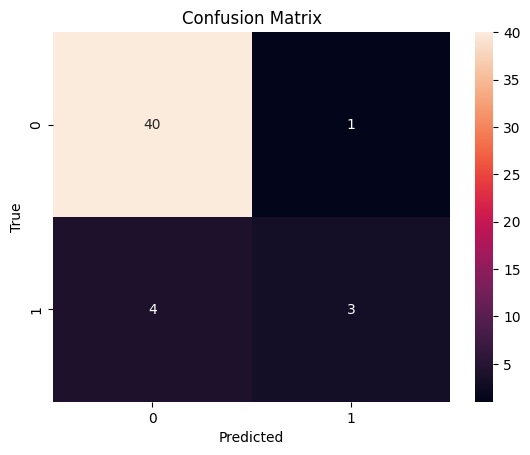

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,zero_division=0))
print(matrix)

### **Interpretation**

**Accuracy of 0.90:**
  
- **Accuracy**: The model achieves an accuracy of 90%, indicating that 90% of the predictions made by the model are correct.

- **Confusion Matrix**:
  - **True Negatives (TN)**: 40 - The number of instances correctly predicted as not likely to change (0).
  - **False Positives (FP)**: 1 - The number of instances incorrectly predicted as likely to change (1) when they are not.
  - **False Negatives (FN)**: 4 - The number of instances incorrectly predicted as not likely to change (0) when they are likely to change (1).
  - **True Positives (TP)**: 3 - The number of instances correctly predicted as likely to change (1).

- **Classification Report**:
  - **Precision**: Precision for class 0 (not likely to change) is 0.91, meaning 91% of instances predicted as not likely to change were correct. Precision for class 1 (likely to change) is 0.75, indicating 75% of instances predicted as likely to change were correct.
  - **Recall**: Recall for class 0 is 0.98, indicating 98% of actual instances of not likely to change were correctly predicted. Recall for class 1 is 0.43, meaning 43% of actual instances of likely to change were correctly predicted.
  - **F1-score**: The F1-score combines precision and recall into a single metric. F1-score for class 0 is 0.94, and for class 1 is 0.55.
  
**Overall Summary**: The KNN model demonstrates strong accuracy at 90%, driven by high precision and recall for class 0 (not likely to change). However, the model's performance is weaker for class 1 (likely to change), showing lower recall and F1-score, indicating challenges in correctly identifying instances where individuals are likely to switch transportation modes.

##2.2. KNN using manhattan

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8,metric="manhattan")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

In [ ]:
y_pred = knn.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0]


0.875
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.67      0.29      0.40         7

    accuracy                           0.88        48
   macro avg       0.78      0.63      0.67        48
weighted avg       0.86      0.88      0.85        48

[[40  1]
 [ 5  2]]


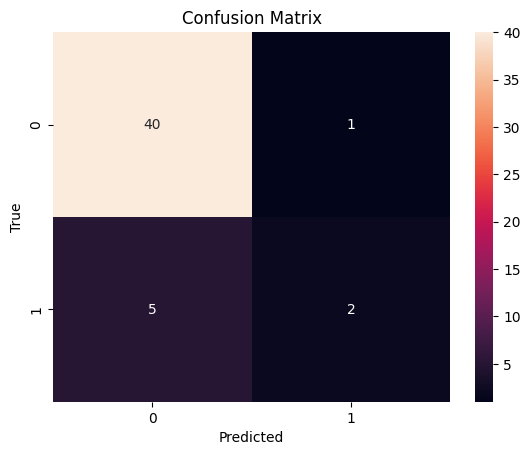

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(matrix)

### **Interpretation**

**Accuracy of 0.875:**

- **Accuracy**: The model achieves an accuracy of 88%, indicating that 88% of the predictions made by the model are correct.

- **Confusion Matrix**:
  - **True Negatives (TN)**: 40 - The number of instances correctly predicted as not likely to change (0).
  - **False Positives (FP)**: 1 - The number of instances incorrectly predicted as likely to change (1) when they are not.
  - **False Negatives (FN)**: 5 - The number of instances incorrectly predicted as not likely to change (0) when they are likely to change (1).
  - **True Positives (TP)**: 2 - The number of instances correctly predicted as likely to change (1).

- **Classification Report**:
  - **Precision**: Precision for class 0 (not likely to change) is 0.89, meaning 89% of instances predicted as not likely to change were correct. Precision for class 1 (likely to change) is 0.67, indicating 67% of instances predicted as likely to change were correct.
  - **Recall**: Recall for class 0 is 0.98, indicating 98% of actual instances of not likely to change were correctly predicted. Recall for class 1 is 0.29, meaning 29% of actual instances of likely to change were correctly predicted.
  - **F1-score**: The F1-score combines precision and recall into a single metric. F1-score for class 0 is 0.93, and for class 1 is 0.40.
  
**Overall Summary**: The model achieves a high accuracy of 88%, driven primarily by high precision and recall for class 0 (not likely to change). However, it shows weaker performance for class 1 (likely to change), with lower recall and F1-score, indicating challenges in correctly identifying instances where individuals are likely to switch transportation modes.

##2.3. KNN using euclidiean

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8,metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [ ]:
y_pred = knn.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0]


0.8958333333333334
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.75      0.43      0.55         7

    accuracy                           0.90        48
   macro avg       0.83      0.70      0.74        48
weighted avg       0.89      0.90      0.88        48

[[40  1]
 [ 4  3]]


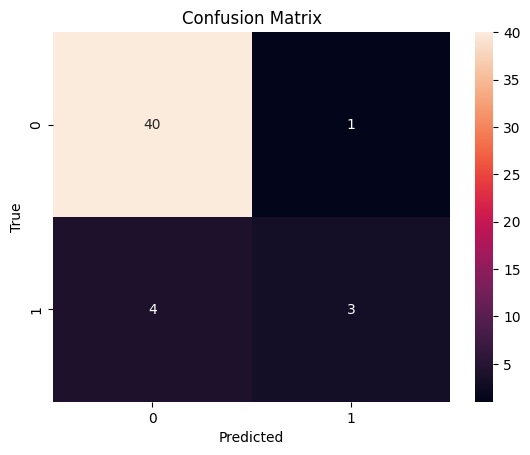

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(matrix)

### **Interpretation**

**KNN using Euclidean Distance:**

- **Accuracy**: The model achieves an accuracy of 90%, indicating that 90% of the predictions made by the model are correct.

- **Confusion Matrix**:
  - **True Negatives (TN)**: 40 - The number of instances correctly predicted as not likely to change (0).
  - **False Positives (FP)**: 1 - The number of instances incorrectly predicted as likely to change (1) when they are not.
  - **False Negatives (FN)**: 4 - The number of instances incorrectly predicted as not likely to change (0) when they are likely to change (1).
  - **True Positives (TP)**: 3 - The number of instances correctly predicted as likely to change (1).

- **Classification Report**:
  - **Precision**: Precision for class 0 (not likely to change) is 0.91, meaning 91% of instances predicted as not likely to change were correct. Precision for class 1 (likely to change) is 0.75, indicating 75% of instances predicted as likely to change were correct.
  - **Recall**: Recall for class 0 is 0.98, indicating 98% of actual instances of not likely to change were correctly predicted. Recall for class 1 is 0.43, meaning 43% of actual instances of likely to change were correctly predicted.
  - **F1-score**: The F1-score combines precision and recall into a single metric. F1-score for class 0 is 0.94, and for class 1 is 0.55.
  
**Overall Summary**: The KNN model using Euclidean distance achieves a high accuracy of 90%. It shows strong performance in predicting class 0 (not likely to change), with high precision and recall. However, it struggles more with class 1 (likely to change), as evidenced by lower precision and recall, indicating challenges in correctly identifying instances where individuals are likely to switch transportation modes.

# **3.Naive Bayes**

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print("The Predicted values : ",y_pred)

The Predicted values :  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0]


Accuracy: 0.88
[[40  1]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.67      0.29      0.40         7

    accuracy                           0.88        48
   macro avg       0.78      0.63      0.67        48
weighted avg       0.86      0.88      0.85        48



<Axes: >

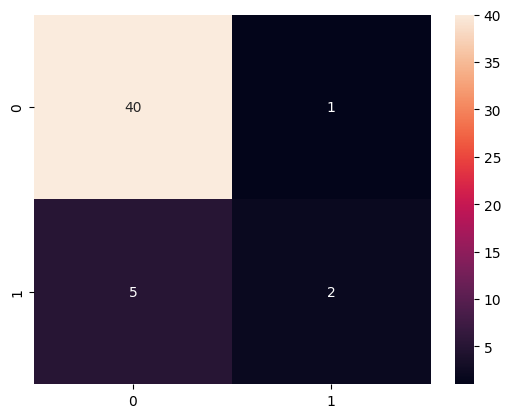

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

## **Interpretation**

**Accuracy of 0.88**

- **Accuracy**: The Naive Bayes model achieves an accuracy of 88%, indicating that 88% of the predictions made by the model are correct.

- **Confusion Matrix**:
  - **True Negatives (TN)**: 40 - The number of instances correctly predicted as not likely to change (0).
  - **False Positives (FP)**: 1 - The number of instances incorrectly predicted as likely to change (1) when they are not.
  - **False Negatives (FN)**: 5 - The number of instances incorrectly predicted as not likely to change (0) when they are likely to change (1).
  - **True Positives (TP)**: 2 - The number of instances correctly predicted as likely to change (1).

- **Classification Report**:
  - **Precision**: Precision for class 0 (not likely to change) is 0.89, meaning 89% of instances predicted as not likely to change were correct. Precision for class 1 (likely to change) is 0.67, indicating 67% of instances predicted as likely to change were correct.
  - **Recall**: Recall for class 0 is 0.98, indicating 98% of actual instances of not likely to change were correctly predicted. Recall for class 1 is 0.29, meaning only 29% of actual instances of likely to change were correctly predicted.
  - **F1-score**: The F1-score combines precision and recall into a single metric. F1-score for class 0 is 0.93, and for class 1 is 0.40.
  
**Overall Summary**: The Naive Bayes model achieves an accuracy of 88%, showing a reasonable performance in predicting whether individuals are likely to switch transportation modes. It demonstrates higher precision and recall for class 0 (not likely to change), indicating better predictive capability for this class. However, it performs less well for class 1 (likely to change), with lower precision and recall, suggesting challenges in correctly identifying instances where individuals are likely to switch transportation modes.

## **ROC Curve and AUC**

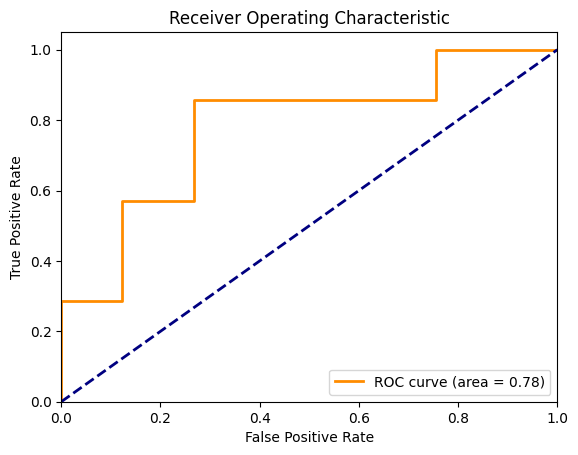

In [ ]:
y_test_binary = np.where(y_test == 1, 1, 0)
y_pred_binary = np.where(y_pred == 1, 1, 0)
fpr, tpr, thresholds = roc_curve(y_test_binary, classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test_binary, classifier.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Observation:**

**AUC of 0.78:**

An AUC (Area Under the Curve) of 0.78 indicates that the model has a good ability to distinguish between the two classes (likely to change and not likely to change transportation modes). This score suggests that the model performs significantly better than random guessing in classifying instances.

However, while 0.78 is considered decent, it also implies that there is some room for improvement in the model's discriminative ability. Further optimizations or adjustments could potentially enhance its performance in accurately predicting the likelihood of switching transportation modes.

Overall, an AUC of 0.78 signifies a solid performance with notable predictive capability, particularly in distinguishing between the classes it was trained to identify.

# **4.Random Forest Classifier**

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        41
           1       1.00      0.14      0.25         7

    accuracy                           0.88        48
   macro avg       0.94      0.57      0.59        48
weighted avg       0.89      0.88      0.83        48



<Axes: >

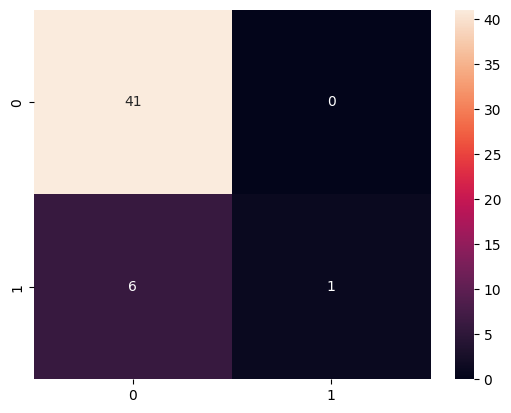

In [ ]:
classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

## **Interpretation**

**Random Forest**

1. **Accuracy: 0.88**

   The accuracy of the Random Forest model is 88%, indicating that 88% of the predictions made by the model are correct.

2. **Confusion Matrix:**
   
   [[41  0]
    [ 6  1]]
   
   - **True Positives (TP)**: 41 - Instances correctly predicted as not likely to change (0).
   - **False Positives (FP)**: 0 - Instances incorrectly predicted as likely to change (1) when they are not.
   - **False Negatives (FN)**: 6 - Instances incorrectly predicted as not likely to change (0) when they are likely to change (1).
   - **True Negatives (TN)**: 1 - Instances correctly predicted as likely to change (1).

3. **Classification Report:**
   
   - **Precision**: Precision for class 0 (not likely to change) is 0.87, meaning 87% of instances predicted as not likely to change were correct. Precision for class 1 (likely to change) is 1.00, indicating 100% of instances predicted as likely to change were correct.
   
   - **Recall**: Recall for class 0 is 1.00, indicating 100% of actual instances of not likely to change were correctly predicted. Recall for class 1 is 0.14, meaning only 14% of actual instances of likely to change were correctly predicted.
   
   - **F1-score**: The F1-score combines precision and recall into a single metric. F1-score for class 0 is 0.93, and for class 1 is 0.25.
   
   - **Support**: The number of instances in each class (41 for class 0 and 7 for class 1).

**Overall Summary:**

The Random Forest model achieves a high accuracy of 88%, driven primarily by excellent precision and recall for class 0 (not likely to change). However, the model struggles with class 1 (likely to change), showing much lower recall, which indicates challenges in correctly identifying instances where individuals are likely to switch transportation modes. The F1-score for class 1 also reflects this imbalance, suggesting that the model's performance in predicting class 1 instances needs improvement.

## **Cross - Validation Scores**

In [ ]:
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.73684211 0.73684211 0.73684211 0.75675676 0.81081081]
Mean CV accuracy: 0.7556187766714083


**Observation:**

1. **Cross-validation scores**: [0.737, 0.737, 0.737, 0.757, 0.811]

   These are the accuracy scores obtained from each fold of the cross-validation process. Each score represents the accuracy achieved on a different subset of the training data.

2. **Mean CV accuracy**: 0.756

   The mean cross-validation accuracy is calculated as approximately 0.756. This indicates that, on average, the model achieves an accuracy of 75.6% across all folds during the cross-validation process.

**Interpretation:**

The cross-validation scores show consistent performance across different folds, with accuracies ranging from 73.7% to 81.1%. The mean cross-validation accuracy of 75.6% suggests that the model is reasonably stable and performs consistently well on various subsets of the training data. This metric provides a robust estimate of the model's generalization performance, indicating that it is likely to achieve similar accuracy when applied to new, unseen data.

# **5.Support Vector Machine**

In [ ]:
classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0]


Accuracy: 0.88
[[41  0]
 [ 6  1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        41
           1       1.00      0.14      0.25         7

    accuracy                           0.88        48
   macro avg       0.94      0.57      0.59        48
weighted avg       0.89      0.88      0.83        48



<Axes: >

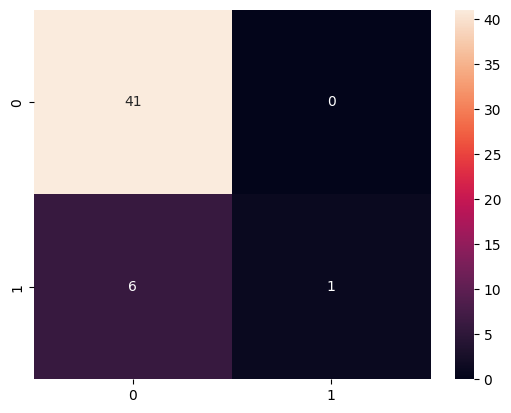

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

## **Interpretation**

**Accuracy**: 0.88

The overall accuracy of the Support Vector Machine (SVM) model is 88%, indicating that 88% of the predictions made by the model are correct.

**Confusion Matrix**:
- **True Negatives (TN)**: 41
  - The model correctly predicted 41 instances as not belonging to class 1 (likely to change).
  
- **False Positives (FP)**: 0
  - There were no instances predicted as belonging to class 1 when they actually did not (false alarms).

- **False Negatives (FN)**: 6
  - The model incorrectly predicted 6 instances as not belonging to class 1 when they actually did (missed opportunities).

- **True Positives (TP)**: 1
  - The model correctly predicted only 1 instance as belonging to class 1 (likely to change).

**Classification Report**:
- **Precision**:
  - Precision for class 0 (not likely to change) is 0.87, indicating that 87% of instances predicted as not likely to change were correct.
  - Precision for class 1 (likely to change) is 1.00, indicating that 100% of instances predicted as likely to change were correct.

- **Recall**:
  - Recall for class 0 is 1.00, indicating that 100% of actual instances of not likely to change were correctly predicted.
  - Recall for class 1 is 0.14, indicating that only 14% of actual instances of likely to change were correctly predicted.

- **F1-score**:
  - The F1-score combines precision and recall into a single metric. F1-score for class 0 is 0.93, and for class 1 is 0.25.

- **Support**:
  - There are 41 instances for class 0 and 7 instances for class 1 in the test set.

**Overall Summary**:
The SVM model shows high precision for class 1 but relatively low recall, suggesting that while it correctly identifies instances it predicts as likely to change, it misses a significant number of actual instances. The high accuracy is primarily driven by the correct classification of class 0 instances (not likely to change). The model's performance on class 1 indicates room for improvement, possibly through adjusting the model parameters or using different techniques to handle the class imbalance.

##**Precision-Recall Curve**

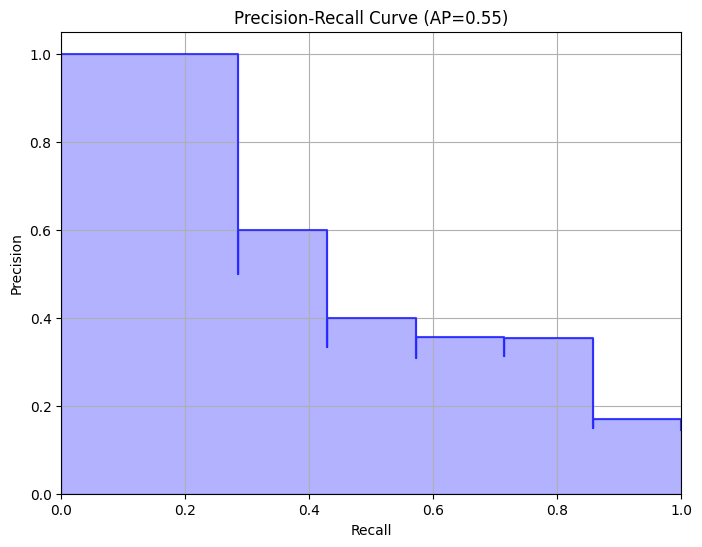

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Predict probabilities on test set
y_scores = classifier.decision_function(X_test)

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute average precision score
average_precision = average_precision_score(y_test, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='b', alpha=0.7)
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.grid(True)
plt.show()


**Observation**:

The precision-recall curve with steps indicates that the classifier's predictions are based on discrete thresholds rather than continuous probabilities. The curve illustrates how precision and recall change with varying thresholds. An average precision (AP) of 0.55 suggests that the model achieves moderate performance in precision-recall trade-off. It indicates that the classifier can achieve reasonable precision while maintaining a moderate level of recall across different thresholds. However, there is still potential for improvement in both precision and recall, indicating that fine-tuning the threshold could enhance the model's predictive ability.

# **Overall Conclusion**

**Exploratory Data Analysis (EDA)**

The first step involved performing Exploratory Data Analysis (EDA) to unerstand the data distribution,identify patterns, and detect any anomalies or missing values. Various visualizations, including pie charts,bar plots,word cloud,heatmaps were employed to get insights into the relationships between different features and the target variables.

**Data Preparation**

After EDA,the dataset was split into training and testing sets to evaluate the model's performance accurately.Feature scaling wasapplied to normalise the data,ensuring that all the features contributed equally to the model's learning process.This step was very crucial to remove biasness from the data.

**Comparing all Models Implemented - Accuracy Score**

*   Decision Tree using Gini Index-
    
    - Accuracy Score - 0.77
    - AUC - 0.58


*   Decision Tree using Entropy -

    - Accuracy Score - 0.69

    - AUC - 0.46

*   KNN (Minkowski) -

    - Accuracy Score   - 0.90

*   KNN (Manhattan) - 0.88
*   KNN (Euclidean) - 0.90
*   Naive Bayes -

    - Accuracy Score - 0.88

    - AUC - 0.78
*   Random Forest Classifier -

    - Accuracy Score - 0.88

    - Cross-validation scores: [0.73684211 0.73684211 0.73684211 0.75675676 0.81081081]

    - Mean CV accuracy: 0.7556187766714083
*   Support Vector Machine - 0.88

    - Accuracy Score - 0.88

    - Precision-Recall Curve (AP= 0.55)


---
**KNN Classifier using Minkowski distance metric and KNN classifier using Euclidean distance metric emerged as the best performing algorithm for our dataset.**

KNN, using either minkowski or euclidean disance metrics, are recommended for fulfilling our objective.Their high accuracy and interpretability make them highly suitable for the particular dataset








